#### Importing the Liberaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Importing the Dataset

In [2]:
bike_rides = pd.read_csv('assignment3_hour.csv')

In [3]:
bike_rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240,0.288,0.810,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220,0.273,0.800,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220,0.273,0.800,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240,0.288,0.750,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240,0.288,0.750,0.000,0,1,1


In [4]:
print ('Dataset has ',bike_rides.shape[1],' Features &',bike_rides.shape[0],' Records')

Dataset has  17  Features & 17379  Records


#### Performing EDA

In [5]:
# Checking Column names

for names in bike_rides.columns:
    print(names)

instant
dteday
season
yr
mnth
hr
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [6]:
# Describing Dataset

bike_rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,8690.000,2.502,0.503,6.538,11.547,0.029,3.004,0.683,1.425,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,5017.029,1.107,0.500,3.439,6.914,0.167,2.006,0.465,0.639,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,4345.500,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8690.000,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,13034.500,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,17379.000,4.000,1.000,12.000,23.000,1.000,6.000,1.000,4.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000


In [7]:
# Looking for Missing Values
print(bike_rides.isnull().sum(),'\n')
print('Since there are no missing values, we do not need to perform Data Imputation.')

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

Since there are no missing values, we do not need to perform Data Imputation.


In [8]:
# Looking for correlation among features
corr_matrix = bike_rides.corr()
corr_matrix['cnt'].sort_values(ascending=False).head(10)

cnt          1.000
registered   0.972
casual       0.695
temp         0.405
atemp        0.401
hr           0.394
instant      0.278
yr           0.250
season       0.178
mnth         0.121
Name: cnt, dtype: float64

#### Handling Categorical Variables | Creating Dummy Variables

In [9]:
# Creating Dummy variables
Dummies_col=bike_rides[['season','mnth','hr','weekday','weathersit','yr','holiday','workingday']]

print(Dummies_col.head())

for fields in Dummies_col:
    dummies = pd.get_dummies(bike_rides[fields],prefix=fields,drop_first=True)
    bike_rides=pd.concat([bike_rides,dummies],axis=1)
    bike_rides=bike_rides.drop(fields,axis=1)

   season  mnth  hr  weekday  weathersit  yr  holiday  workingday
0       1     1   0        6           1   0        0           0
1       1     1   1        6           1   0        0           0
2       1     1   2        6           1   0        0           0
3       1     1   3        6           1   0        0           0
4       1     1   4        6           1   0        0           0


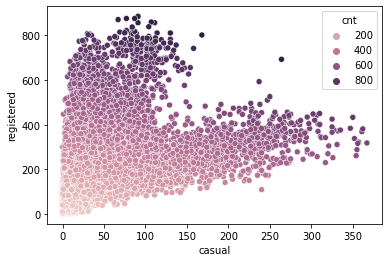

In [10]:
sns.scatterplot(x='casual',y='registered',hue='cnt',data=bike_rides)
plt.show()

In [11]:
# Dropping Index and Date Columns
bike_rides.drop(['instant','dteday'],axis=1,inplace=True)
bike_rides

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4,yr_1,holiday_1,workingday_1
0,0.240,0.288,0.810,0.000,3,13,16,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.220,0.273,0.800,0.000,8,32,40,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.220,0.273,0.800,0.000,5,27,32,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.240,0.288,0.750,0.000,3,10,13,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.240,0.288,0.750,0.000,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.260,0.258,0.600,0.164,11,108,119,0,0,0,...,0,0,0,0,1,0,0,1,0,1
17375,0.260,0.258,0.600,0.164,8,81,89,0,0,0,...,0,0,0,0,1,0,0,1,0,1
17376,0.260,0.258,0.600,0.164,7,83,90,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17377,0.260,0.273,0.560,0.134,13,48,61,0,0,0,...,0,0,0,0,0,0,0,1,0,1


#### Handling Continuous Variables & Feature Scaling

In [12]:
# Only continuous explainatory variables i.e. bike_rides.iloc[:,:6] is selected.
# Dummy variables should not be scaled.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bike_rides.iloc[:,:6] = scaler.fit_transform(bike_rides.iloc[:,:6])

In [13]:
# Resultant Scaled Dataset
bike_rides

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4,yr_1,holiday_1,workingday_1
0,0.224,0.288,0.810,0.000,0.008,0.015,16,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.204,0.273,0.800,0.000,0.022,0.036,40,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.204,0.273,0.800,0.000,0.014,0.030,32,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.224,0.288,0.750,0.000,0.008,0.011,13,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.224,0.288,0.750,0.000,0.000,0.001,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.245,0.258,0.600,0.193,0.030,0.122,119,0,0,0,...,0,0,0,0,1,0,0,1,0,1
17375,0.245,0.258,0.600,0.193,0.022,0.091,89,0,0,0,...,0,0,0,0,1,0,0,1,0,1
17376,0.245,0.258,0.600,0.193,0.019,0.094,90,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17377,0.245,0.273,0.560,0.158,0.035,0.054,61,0,0,0,...,0,0,0,0,0,0,0,1,0,1


#### Splitting Data into Train-Test Dataset

In [14]:
# Creating y dataset
y = bike_rides.iloc[:, 6].values

In [15]:
print(y)

[16 40 32 ... 90 61 49]


In [16]:
bike_rides.drop(['cnt'],axis=1).head()

,temp,atemp,hum,windspeed,casual,registered,season_2,season_3,season_4,mnth_2,...,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4,yr_1,holiday_1,workingday_1
0,0.224,0.288,0.810,0.000,0.008,0.015,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.204,0.273,0.800,0.000,0.022,0.036,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.204,0.273,0.800,0.000,0.014,0.030,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.224,0.288,0.750,0.000,0.008,0.011,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.224,0.288,0.750,0.000,0.000,0.001,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
#Creating X dataset
X = bike_rides.iloc[:,:].values

In [18]:
print(X)

[[0.2244898  0.2879     0.81       ... 0.         0.         0.        ]
 [0.20408163 0.2727     0.8        ... 0.         0.         0.        ]
 [0.20408163 0.2727     0.8        ... 0.         0.         0.        ]
 ...
 [0.24489796 0.2576     0.6        ... 1.         0.         1.        ]
 [0.24489796 0.2727     0.56       ... 1.         0.         1.        ]
 [0.24489796 0.2727     0.65       ... 1.         0.         1.        ]]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Model 1

#### Creating Deep Learning Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [21]:
DL_model = Sequential([
    Dense(17, activation='relu'),
    Dense(24, activation='relu'),
    Dense(14, activation='relu'),
    Dense(19, activation='relu'),
    Dense(1)
])

In [22]:
DL_model.compile(optimizer='adam', loss='mean_absolute_error')
DL_model.layers

#### Training Deep Learning Model

In [23]:
%%time
deep_learn=DL_model.fit(
    x=X_train, 
    y=y_train, 
    validation_data=(X_test, y_test),
    batch_size=100, 
    epochs=500)

Epoch 1/500
140/140 [==============================] - 1s 2ms/step - loss: 54.1932 - val_loss: 0.6706
Epoch 2/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5909 - val_loss: 0.3636
Epoch 3/500
140/140 [==============================] - 0s 2ms/step - loss: 0.7473 - val_loss: 0.6796
Epoch 4/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5608 - val_loss: 1.0635
Epoch 5/500
140/140 [==============================] - 0s 2ms/step - loss: 0.6849 - val_loss: 0.4117
Epoch 6/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5885 - val_loss: 0.1236
Epoch 7/500
140/140 [==============================] - 0s 2ms/step - loss: 0.6506 - val_loss: 0.3347
Epoch 8/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5648 - val_loss: 0.6448
Epoch 9/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4477 - val_loss: 0.5483
Epoch 10/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4459 - val_l

140/140 [==============================] - 0s 2ms/step - loss: 0.4413 - val_loss: 0.7435
Epoch 82/500
140/140 [==============================] - 0s 2ms/step - loss: 0.7627 - val_loss: 0.0498
Epoch 83/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4146 - val_loss: 0.0623
Epoch 84/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5442 - val_loss: 0.6612
Epoch 85/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5160 - val_loss: 0.7768
Epoch 86/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4820 - val_loss: 1.2801
Epoch 87/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3997 - val_loss: 0.2359
Epoch 88/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4792 - val_loss: 0.2101
Epoch 89/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4359 - val_loss: 0.5285
Epoch 90/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3917 - val_loss: 

Epoch 161/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4963 - val_loss: 0.7265
Epoch 162/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4303 - val_loss: 0.7902
Epoch 163/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5548 - val_loss: 0.3024
Epoch 164/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4052 - val_loss: 0.5957
Epoch 165/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4782 - val_loss: 0.3020
Epoch 166/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3285 - val_loss: 0.4017
Epoch 167/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3200 - val_loss: 0.3166
Epoch 168/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4492 - val_loss: 0.5507
Epoch 169/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4236 - val_loss: 0.8460
Epoch 170/500
140/140 [==============================] - 0s 2ms/step - lo

140/140 [==============================] - 0s 2ms/step - loss: 0.5714 - val_loss: 0.8596
Epoch 241/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5602 - val_loss: 1.5969
Epoch 242/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3786 - val_loss: 0.0845
Epoch 243/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3284 - val_loss: 0.1475
Epoch 244/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3316 - val_loss: 0.7372
Epoch 245/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4180 - val_loss: 0.3659
Epoch 246/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5185 - val_loss: 0.2586
Epoch 247/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5146 - val_loss: 0.1392
Epoch 248/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3464 - val_loss: 0.9644
Epoch 249/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3725 - v

140/140 [==============================] - 0s 2ms/step - loss: 0.5584 - val_loss: 0.7071
Epoch 320/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3481 - val_loss: 0.6566
Epoch 321/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3314 - val_loss: 0.2987
Epoch 322/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3524 - val_loss: 0.1746
Epoch 323/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3877 - val_loss: 0.3150
Epoch 324/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5048 - val_loss: 0.0734
Epoch 325/500
140/140 [==============================] - 0s 2ms/step - loss: 0.2942 - val_loss: 0.6173
Epoch 326/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3385 - val_loss: 0.0164
Epoch 327/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4222 - val_loss: 0.1276
Epoch 328/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3978 - v

140/140 [==============================] - 0s 2ms/step - loss: 0.5486 - val_loss: 0.0800
Epoch 399/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3484 - val_loss: 1.0074
Epoch 400/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4774 - val_loss: 0.3442
Epoch 401/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3176 - val_loss: 0.1003
Epoch 402/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3359 - val_loss: 0.3028
Epoch 403/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4596 - val_loss: 0.7084
Epoch 404/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4185 - val_loss: 0.5489
Epoch 405/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4471 - val_loss: 0.5042
Epoch 406/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3881 - val_loss: 0.6272
Epoch 407/500
140/140 [==============================] - 0s 2ms/step - loss: 0.5466 - v

140/140 [==============================] - 0s 2ms/step - loss: 0.5143 - val_loss: 0.0573
Epoch 478/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4202 - val_loss: 1.7146
Epoch 479/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3620 - val_loss: 0.1486
Epoch 480/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3933 - val_loss: 0.6702
Epoch 481/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3784 - val_loss: 0.4235
Epoch 482/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3735 - val_loss: 0.1264
Epoch 483/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4510 - val_loss: 0.2085
Epoch 484/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3597 - val_loss: 0.1776
Epoch 485/500
140/140 [==============================] - 0s 2ms/step - loss: 0.3612 - val_loss: 0.7735
Epoch 486/500
140/140 [==============================] - 0s 2ms/step - loss: 0.4592 - v

In [24]:
losses = pd.DataFrame(deep_learn.history)
losses['epoch'] = deep_learn.epoch
losses

,loss,val_loss,epoch
0,54.193,0.671,0
1,0.591,0.364,1
2,0.747,0.680,2
3,0.561,1.063,3
4,0.685,0.412,4
...,...,...,...
495,0.521,0.519,495
496,0.486,0.551,496
497,0.419,0.169,497
498,0.382,0.258,498


In [25]:
def plot_loss(deep_learn):
  plt.plot(deep_learn.history['loss'], label='loss')
  plt.plot(deep_learn.history['val_loss'], label='val_loss')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [cnt]')
  plt.legend()
  plt.grid(True)

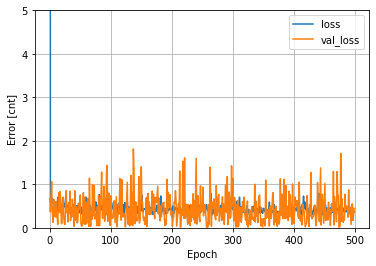

In [26]:
plot_loss(deep_learn)

#### Making Prediction using Deep Learning Model

In [27]:
DL_ypred=DL_model.predict(X_test)

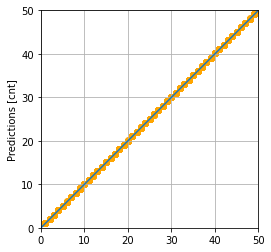

In [28]:
a = plt.axes(aspect='equal')
plt.scatter(y_test,DL_ypred, c='orange')
plt.ylabel('Predictions [cnt]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.grid(True)
_ = plt.plot(lims, lims)

In [29]:
DL_error = DL_ypred - y_test

In [30]:
#plt.hist(DL_error, bins=25)
#plt.xlabel('Prediction Error [cnt]')
#_ = plt.ylabel('Count')

#### Model 1 : Performance Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [32]:
print('\033[1mPerformance Metrics Result for Deep Learning Model\n\n\033[0m')
print('\033[1mMean Absolute Error     : \033[0m',mean_absolute_error(y_test,DL_ypred),'\n')
print('\033[1mMean Squared Error      : \033[0m',mean_squared_error(y_test,DL_ypred),'\n')
print('\033[1mRoot Mean Square Error  : \033[0m',(np.sqrt(mean_absolute_error(y_test,DL_ypred))),'\n')
print('\033[1mExplained Variance Score: \033[0m',explained_variance_score(y_test,DL_ypred),'\n')

Performance Metrics Result for Deep Learning Model


Mean Absolute Error     :  0.4483106357867479 

Mean Squared Error      :  0.38583826651587877 

Root Mean Square Error  :  0.6695600315033357 

Explained Variance Score:  0.999994161636162 



In [33]:
DL_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                969       
                                                                 
 dense_1 (Dense)             (None, 24)                432       
                                                                 
 dense_2 (Dense)             (None, 14)                350       
                                                                 
 dense_3 (Dense)             (None, 19)                285       
                                                                 
 dense_4 (Dense)             (None, 1)                 20        
                                                                 
Total params: 2,056
Trainable params: 2,056
Non-trainable params: 0
_________________________________________________________________


## Model 2

#### Creating Machine Learning Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
LM_model = LinearRegression()

#### Training Machine Learning Model

In [36]:
linear_model = LM_model.fit(X_train,y_train)

#### Making Prediction using Machine Learning Model

In [37]:
LM_ypred=linear_model.predict(X_test)

LM_ypred

array([425.,  88.,   4., ...,  98., 266., 267.])

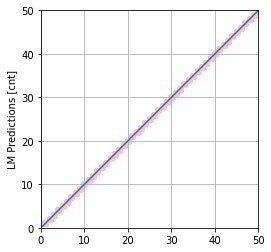

In [38]:
b = plt.axes(aspect='equal')
plt.scatter(y_test,LM_ypred, c='pink')
plt.ylabel('LM Predictions [cnt]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.grid(True)
_ = plt.plot(lims, lims)

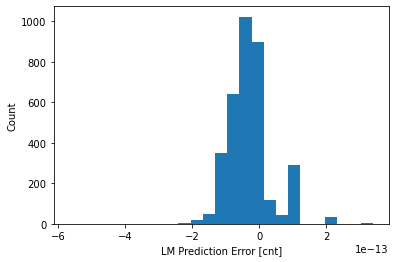

In [39]:
LM_error = LM_ypred - y_test

plt.hist(LM_error, bins=25)
plt.xlabel('LM Prediction Error [cnt]')
_ = plt.ylabel('Count')

#### Model 2 : Performance Evaluation

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [41]:
print('\033[1mPerformance Metrics Result for Machine Learning Model\n\n\033[0m')
print('\033[1mMean Absolute Error     : \033[0m',mean_absolute_error(y_test,LM_ypred),'\n')
print('\033[1mMean Squared Error      : \033[0m',mean_squared_error(y_test,LM_ypred),'\n')
print('\033[1mRoot Mean Square Error  : \033[0m',(np.sqrt(mean_absolute_error(y_test,LM_ypred))),'\n')
print('\033[1mExplained Variance Score: \033[0m',explained_variance_score(y_test,LM_ypred),'\n')
print('\033[1mR2 Score: \033[0m',r2_score(y_test,LM_ypred),'\n')

Performance Metrics Result for Machine Learning Model


Mean Absolute Error     :  5.601902396758017e-14 

Mean Squared Error      :  5.453297734413784e-27 

Root Mean Square Error  :  2.36683383378682e-07 

Explained Variance Score:  1.0 

R2 Score:  1.0 



In [42]:
from statsmodels.api import OLS

print(OLS(y_test,LM_ypred).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.375e+34
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:27:46   Log-Likelihood:                          99181.
No. Observations:                3476   AIC:                                 -1.984e+05
Df Residuals:                    3475   BIC:                                 -1.984e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Comparison of Both Models - DL vs ML

In [43]:
Result=pd.DataFrame()

print('\033[1m\n\n---------------- COMPARISON OF RESULTS ----------------\033[0m\n')
Result['Actual Demand']=y_test
Result['DL Predicted Demand']=DL_ypred
Result['LM Predicted Demand']=LM_ypred
Result



---------------- COMPARISON OF RESULTS ----------------



,Actual Demand,DL Predicted Demand,LM Predicted Demand
0,425,426.014,425.000
1,88,88.207,88.000
2,4,4.021,4.000
3,526,527.248,526.000
4,13,13.034,13.000
...,...,...,...
3471,17,17.041,17.000
3472,85,85.202,85.000
3473,98,98.242,98.000
3474,266,266.640,266.000
